# FAIRe Qualitäts-KPIs
Autor:Philipp Schmidt 2868473  
Datum:31.10.23

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Wie baut man ein gutes Lego Auto?
Was macht ein gutes Lego Auto aus?

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

Mindestanforderung: elektrisch angetriebenes, vierrädriges Auto
Optimal Ziel: Möglichst simpel, geringes Gewicht, geringer Preis, schnelle Lieferzeit  

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


![Bild 26.10.23 um 10.51](figures/Bild1.jpeg)


Beschreiben Sie kurz und präzise Ihr Fahrzeug:

Es handelt sich um ein Auto mit vier großen Motorradrädern, einem M Motor der die Hinterachse antreibt, einer Akkubox, einem einstufigem Kegelradgetriebe und einem simplen Liftarmrahmen

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [37]:
import json
import pprint
from functions import calculation_rules
from functions.classes import AggregationLayer
from functions.classes import LegoComponent
from functions.classes import LegoAssembly
from functions.classes import KPIEncoder
from functions.classes import print_assembly_tree
import datasheets

In [38]:
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)    
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)    
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)    
#teile drucken
print(axles["60485"]) 
print(axles["32073"])
print(frame["6538"])
print(gears["3650"])
print(frame["3713"])
print(wheels["2903c02"])
#Vorderachse generieren
front_axle = LegoComponent("front axle", axles["32073"], axles["32073"], axles["60485"], frame["6538"], frame["6538"])
#Hinterachse generieren
back_axle = LegoComponent("front axle", frame["3713"], gears["3650"], axles["32073"], axles["32073"], axles["60485"], frame["6538"], frame["6538"])
#Rad vorne rechts generieren
front_right_wheel = LegoComponent(
    "front right wheel", wheels["2903c02"], surface="rough", paint="glossy")
pprint.pprint(front_right_wheel.properties)
#sonstige Räder generieren
front_left_wheel = front_right_wheel.clone("front left wheel")
back_right_wheel = front_right_wheel.clone("back right wheel")
back_left_wheel = front_right_wheel.clone("back left wheel")
#Batteriebox generieren
print(batteries["88000-1"])
batterie = LegoComponent("batterie", batteries["88000-1"])
#Motor generieren
print(motors["8883-1"])
motor = LegoComponent("motor", motors["8883-1"])
#Rahmen Teile drucken
print(axles["32073"])
print(frame["3673"])
print(frame["32524"])
print(frame["40490"])
print(frame["3702"])
print(gears["32269"])
print(frame["39790"])
#Rahmen generieren
car_frame = LegoComponent("car_frame", axles["32073"], frame["3702"], frame["3673"], frame["3673"],
                      frame["3673"], frame["3673"], frame["3673"],
                      frame["3673"], frame["3673"], frame["3673"], frame["3673"], frame["3673"],
                      frame["40490"], frame["32524"], frame["32524"], frame["32524"], frame["32524"],
                      gears["32269"], frame["39790"])
                

{'item number': 60485, 'item description': 'Axle 9 studs', 'category': 'axle', 'price [Euro]': 0.01, 'mass [g]': 1.3, 'delivery time [days]': 7, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=60485#T=S&O={%22iconly%22:0}', 'dimension [studs]': 9}
{'item number': 32073, 'item description': 'Axle 5 studs', 'category': 'axle', 'price [Euro]': 0.001, 'mass [g]': 0.66, 'delivery time [days]': 3, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32073#T=S&O={%22iconly%22:0}', 'dimension [studs]': 5}
{'item number': 6538, 'item description': 'Technic, Axle Connector 2L (Ridged Undetermined Type)', 'category': 'frame', 'price [Euro]': 0.03, 'mass [g]': 0.4, 'delivery time [days]': 5, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=6538#T=C', 'dimension [studs]': '?'}
{'item number': 3650, 'item description': 'Gear 24 Tooth Crown', 'category': 'gear', 'price [Euro]': 0.09, 'mass [g]': 1.03, 'delivery time [days]': 13, 'data 

In [39]:
#Vorderachse einfärben
print(front_axle.properties["label"])
front_axle.properties["color"] = "grey"
#Hinterachse einfärben
print(front_axle.properties["label"])
front_axle.properties["color"] = "grey"
#Stopper auf Hinterachse umfärben
print(frame["3713"])
frame["3713"]["color"]="green"
pprint.pprint(back_axle.properties)
#Rahmen einfärben
print(car_frame.properties["label"])
car_frame.properties["color"] = "grey"

front axle
front axle
{'item number': 3713, 'item description': 'Technic Bush', 'category': 'frame', 'price [Euro]': 0.01, 'mass [g]': 0.14, 'delivery time [days]': 3, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3713&name=Technic%20Bush&category=%5BTechnic%5D#T=S&O={%22iconly%22:0}', 'dimension [studs]': 1}
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=6538#T=C',
 'delivery time [days]': 5,
 'dimension [studs]': '?',
 'item description': 'Technic, Axle Connector 2L (Ridged Undetermined Type)',
 'item number': 6538,
 'label': 'front axle',
 'mass [g]': 0.4,
 'price [Euro]': 0.03}
car_frame


In [54]:
#Vorderachse zusammenbauen
front_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front wheel assembly",
    assembly_method="stick together like lego blocks"
)
front_wheel_assembly.add([front_right_wheel, front_left_wheel, front_axle])
#Hinterachse zusammenbauen
back_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "back wheel assembly",
    assembly_method="stick together like lego blocks"
)
back_wheel_assembly.add([back_right_wheel, back_left_wheel, back_axle])
#Powerunit Zusammenbauen
powerunit_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "powerunit assembly",
    assembly_method="stick together like lego blocks"
)
powerunit_assembly.add([motor, batterie])
#Auto zusammenbauen
car1 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "car1",
    manufacturer="FHC",
    comment="Faster! Harder! Car!"
)
car1.add([car_frame, front_wheel_assembly, back_wheel_assembly, powerunit_assembly])
#Teile des Autos erhalten
print(car1.get_component_list(max_depth=0))
print(car1.get_component_list())

[LegoComponent car_frame [f397d416-77cc-4b0c-aedf-9a8a1d772d1e]]
[LegoComponent car_frame [f397d416-77cc-4b0c-aedf-9a8a1d772d1e], LegoComponent front right wheel [ee492ddd-c2ac-46cc-aacc-a9ad3eca2b12], LegoComponent front left wheel [5738cc33-cca9-4e32-9d4f-c05f626ee019], LegoComponent front axle [e0d1f95e-b456-4dd3-a80d-bf3e19a89a56], LegoComponent back right wheel [1cb8b481-e71e-4267-b331-ef2398ff0d7b], LegoComponent back left wheel [75eb7978-021b-46c1-a774-e418e45f7510], LegoComponent back axle [cac5feac-d548-4856-bd8b-463f90329c43], LegoComponent motor [03058865-0ecc-468f-aa52-3cf3af5d3657], LegoComponent batterie [76bd00e9-48a8-4a20-b6ae-4539e7566243]]


### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

Gesamtmasse=Preis Teil 1+Preis Teil 2+...+Preis Teil n

Gesamtpreis=Preis Teil 1+Preis Teil 2+...+Preis Teil n

Lieferzeit=höchste Lieferzeit eines Teils

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [55]:
# test the import
calculation_rules.test_function()
#Masse berechnen
total_mass = calculation_rules.kpi_mass(car1)

print("Gesamtmasse: ", total_mass, "g")
# Add KPI to system
car1.properties["mass [g]"] = total_mass

# We can also add the mass to the subassemblies.
# children() returns a dict with a list of added
# components and assemblies.
for a in car1.children()["assemblies"]:
    a_mass = 0
    for c in a.get_component_list(-1):
        a_mass += c.properties["mass [g]"]
    a.properties["mass [g]"] = a_mass
#Preis berechnen
total_price = calculation_rules.kpi_price(car1)

print("Gesamtpreis: ", total_price, "Euro")
# Add KPI to system
car1.properties["price [Euro]"] = total_price

# We can also add the price to the subassemblies.
# children() returns a dict with a list of added
# components and assemblies.
for a in car1.children()["assemblies"]:
    a_price = 0
    for c in a.get_component_list(-1):
        a_price += c.properties["price [Euro]"]
    a.properties["price [Euro]"] = a_price
#Lieferzeit berechnen
    delivery_time = calculation_rules.kpi_delivery_time(car1)

print("Lieferzeit: ", delivery_time, "days")
# Add KPI to system
car1.properties["delivery time [days]"] = delivery_time

# We can also add the mass to the subassemblies.
# children() returns a dict with a list of added
# components and assemblies.
#for a in car.children()["assemblies"]:
#    a_time = 0
#    for c in a.get_component_list(-1):
#        a_delivery_time = c.properties["delivery time [days]"]
#    a.properties["delivery time [days]"] = delivery_time

You called the test function.
Gesamtmasse:  185.32999999999998 g
Gesamtpreis:  50.75 Euro
Lieferzeit:  12 days


In [56]:
car1.get_component_list(-1)
# Print the full assembly with all levels
print_assembly_tree(car1)

LegoAssembly car1 [58cab860-7870-4abe-b170-4e91650e27c8]
├── LegoAssembly front wheel assembly [41d93cc2-e825-46d5-a2db-cdec08945b98]
│   ├── LegoComponent front right wheel [ee492ddd-c2ac-46cc-aacc-a9ad3eca2b12]
│   ├── LegoComponent front left wheel [5738cc33-cca9-4e32-9d4f-c05f626ee019]
│   └── LegoComponent front axle [e0d1f95e-b456-4dd3-a80d-bf3e19a89a56]
├── LegoAssembly back wheel assembly [ca7993e9-557a-495b-aa66-86bab691ae23]
│   ├── LegoComponent back right wheel [1cb8b481-e71e-4267-b331-ef2398ff0d7b]
│   ├── LegoComponent back left wheel [75eb7978-021b-46c1-a774-e418e45f7510]
│   └── LegoComponent back axle [cac5feac-d548-4856-bd8b-463f90329c43]
├── LegoAssembly powerunit assembly [5d35deb9-3848-4e32-88ba-917e1dd12fff]
│   ├── LegoComponent motor [03058865-0ecc-468f-aa52-3cf3af5d3657]
│   └── LegoComponent batterie [76bd00e9-48a8-4a20-b6ae-4539e7566243]
└── LegoComponent car_frame [f397d416-77cc-4b0c-aedf-9a8a1d772d1e]


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [57]:
# Dump to json file with to_dict() and KPIEncoder
with open("car1.json", "w") as fp:
    json.dump(car1.to_dict(), fp, cls=KPIEncoder, indent=4)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

Reduzierung von Preis und Gewicht.

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

![auto2.png](figures/auto2.png)
![auto23.png](figures/auto23.png)
![auto24.png](figures/auto24.png)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Es handelt sich um ein Auto mit vier mitteleren Rädernädern, einem M Motor der die Hinterachse achsparallel antreibt, einer Akkubox, einem einstufigem Stirnradgetriebe und einem simpleren Liftarmrahmen.

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [44]:
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)    
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)    
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)    
#teile Achsen drucken
print(axles["50451"])
print(frame["3713"])
print(gears["94925"])
#Vorderachse generieren
front_axle = LegoComponent("front axle", axles["50451"], frame["3713"], frame["3713"])
#Hinterachse generieren
back_axle = LegoComponent("back axle", axles["50451"], frame["3713"], gears["94925"])
#Rad vorne rechts generieren
print(wheels["56904c02"])
front_right_wheel = LegoComponent(
    "front right wheel", wheels["56904c02"], surface="rough", paint="glossy")
#sonstige Räder generieren
front_left_wheel = front_right_wheel.clone("front left wheel")
back_right_wheel = front_right_wheel.clone("back right wheel")
back_left_wheel = front_right_wheel.clone("back left wheel")
#Batteriebox generieren
print(batteries["88000-1"])
batterie = LegoComponent("batterie", batteries["88000-1"])
#Motor generieren
print(motors["8883-1"])
motor = LegoComponent("motor", motors["8883-1"])
#Rahmen generieren
print(frame["39790"])
print(frame["3702"])
print(frame["3700"])
print(frame["32524"])
print(axles["32073"])
print(gears["94925"])
print(frame["3673"])
print(frame["32556"])
#Rahmen generieren
car_frame = LegoComponent("car_frame", frame["39790"], frame["3702"], frame["3700"], frame["32524"],
                          axles["32073"], gears["94925"], frame["3673"], frame["3673"], frame["3673"],
                          frame["32556"], frame["32556"], frame["32556"])
                        
                                                                        

{'item number': 50451, 'item description': 'Axle 16 studs', 'category': 'axle', 'price [Euro]': 0.75, 'mass [g]': 2.37, 'delivery time [days]': 3, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=50451#T=S&O={%22iconly%22:0}', 'dimension [studs]': 16}
{'item number': 3713, 'item description': 'Technic Bush', 'category': 'frame', 'price [Euro]': 0.01, 'mass [g]': 0.14, 'delivery time [days]': 3, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3713&name=Technic%20Bush&category=%5BTechnic%5D#T=S&O={%22iconly%22:0}', 'dimension [studs]': 1}
{'item number': 94925, 'item description': 'Gear 16 Tooth', 'category': 'gear', 'price [Euro]': 0.2, 'mass [g]': 0.7, 'delivery time [days]': 12, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=94925#T=C'}
{'item number': '56904c02', 'item description': 'wheel 43,2', 'category': 'wheel', 'related items': 30699, 'price [Euro]': 0.11, 'mass [g]': 13.0, 'delivery time [days]': 5, 'data 

In [45]:
#Vorderachse einfärben
print(front_axle.properties["label"])
front_axle.properties["color"] = "brown"
#Hinterachse einfärben
print(front_axle.properties["label"])
front_axle.properties["color"] = "grey"
#Rahmen einfärben
print(car_frame.properties["label"])
car_frame.properties["color"] = "grey"

front axle
front axle
car_frame


In [59]:
#Vorderachse zusammenbauen
front_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front wheel assembly",
    assembly_method="stick together like lego blocks"
)
front_wheel_assembly.add([front_right_wheel, front_left_wheel, front_axle]
)
#Hinterachse zusammenbauen
back_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "back wheel assembly",
    assembly_method="stick together like lego blocks"
)
back_wheel_assembly.add([back_right_wheel, back_left_wheel, back_axle]
)
#Powerunit Zusammenbauen
powerunit_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "powerunit assembly",
assembly_method="stick together like lego blocks"
)
powerunit_assembly.add([motor, batterie])
#Auto zusammenbauen
car2 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "car2",
    manufacturer="FHC2",
    comment="Faster! Harder! Car! 2!")
car2.add([car_frame, front_wheel_assembly, back_wheel_assembly, powerunit_assembly])
#Teile des Autos erhalten
print(car2.get_component_list(max_depth=0))
print(car2.get_component_list())

[LegoComponent car_frame [f397d416-77cc-4b0c-aedf-9a8a1d772d1e]]
[LegoComponent car_frame [f397d416-77cc-4b0c-aedf-9a8a1d772d1e], LegoComponent front right wheel [ee492ddd-c2ac-46cc-aacc-a9ad3eca2b12], LegoComponent front left wheel [5738cc33-cca9-4e32-9d4f-c05f626ee019], LegoComponent front axle [e0d1f95e-b456-4dd3-a80d-bf3e19a89a56], LegoComponent back right wheel [1cb8b481-e71e-4267-b331-ef2398ff0d7b], LegoComponent back left wheel [75eb7978-021b-46c1-a774-e418e45f7510], LegoComponent back axle [cac5feac-d548-4856-bd8b-463f90329c43], LegoComponent motor [03058865-0ecc-468f-aa52-3cf3af5d3657], LegoComponent batterie [76bd00e9-48a8-4a20-b6ae-4539e7566243]]


### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [60]:
# test the import
calculation_rules.test_function()
#Masse berechnen
total_mass = calculation_rules.kpi_mass(car2)

print("Gesamtmasse: ", total_mass, "g")
# Add KPI to system
car2.properties["mass [g]"] = total_mass

# We can also add the mass to the subassemblies.
# children() returns a dict with a list of added
# components and assemblies.
for a in car2.children()["assemblies"]:
    a_mass = 0
    for c in a.get_component_list(-1):
        a_mass += c.properties["mass [g]"]
    a.properties["mass [g]"] = a_mass
#Preis berechnen
total_price = calculation_rules.kpi_price(car2)

print("Gesamtpreis: ", total_price, "Euro")
# Add KPI to system
car2.properties["price [Euro]"] = total_price

# We can also add the price to the subassemblies.
# children() returns a dict with a list of added
# components and assemblies.
for a in car2.children()["assemblies"]:
    a_price = 0
    for c in a.get_component_list(-1):
        a_price += c.properties["price [Euro]"]
    a.properties["price [Euro]"] = a_price
#Lieferzeit berechnen
    delivery_time = calculation_rules.kpi_delivery_time(car2)

print("Lieferzeit: ", delivery_time, "days")
# Add KPI to system
car2.properties["delivery time [days]"] = delivery_time

# We can also add the mass to the subassemblies.
# children() returns a dict with a list of added
# components and assemblies.
for a in car2.children()["assemblies"]:
    a_time = 0
    for c in a.get_component_list(-1):
        a_time = c.properties["delivery time [days]"]
    a.properties["delivery time [days]"] = delivery_time

You called the test function.
Gesamtmasse:  185.32999999999998 g
Gesamtpreis:  50.75 Euro
Lieferzeit:  12 days


In [61]:
car2.get_component_list(-1)
# Print the full assembly with all levels
print_assembly_tree(car2)

LegoAssembly car2 [4988a15b-6273-4ed2-99e2-9e4da62793d4]
├── LegoAssembly front wheel assembly [ecc0f20b-e560-4269-941f-538977a95c3b]
│   ├── LegoComponent front right wheel [ee492ddd-c2ac-46cc-aacc-a9ad3eca2b12]
│   ├── LegoComponent front left wheel [5738cc33-cca9-4e32-9d4f-c05f626ee019]
│   └── LegoComponent front axle [e0d1f95e-b456-4dd3-a80d-bf3e19a89a56]
├── LegoAssembly back wheel assembly [4436f615-a165-4711-bd1b-291853996d7a]
│   ├── LegoComponent back right wheel [1cb8b481-e71e-4267-b331-ef2398ff0d7b]
│   ├── LegoComponent back left wheel [75eb7978-021b-46c1-a774-e418e45f7510]
│   └── LegoComponent back axle [cac5feac-d548-4856-bd8b-463f90329c43]
├── LegoAssembly powerunit assembly [1a5ceab8-c979-4a25-a0ad-fae0e4d09a5f]
│   ├── LegoComponent motor [03058865-0ecc-468f-aa52-3cf3af5d3657]
│   └── LegoComponent batterie [76bd00e9-48a8-4a20-b6ae-4539e7566243]
└── LegoComponent car_frame [f397d416-77cc-4b0c-aedf-9a8a1d772d1e]


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [62]:
# Dump to json file with to_dict() and KPIEncoder
with open("car2.json", "w") as fp:
    json.dump(car2.to_dict(), fp, cls=KPIEncoder, indent=4)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

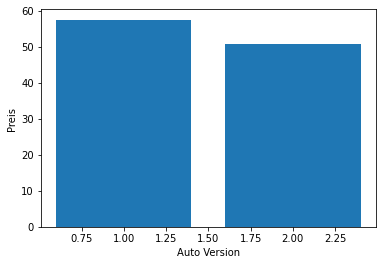

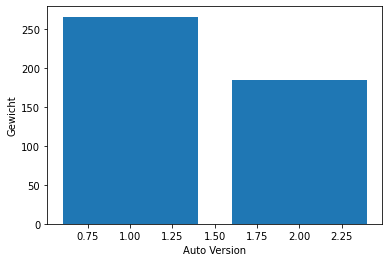

In [76]:
# plot the data, save diagramm as svg-file
import matplotlib.pyplot as plt

ywerte = [57.49, 50.75]
xwerte = [1, 2]
plt.bar(xwerte, ywerte)
plt.xlabel("Auto Version")
plt.ylabel("Preis")
plt.show()


import matplotlib.pyplot as plt

ywerte = [266, 185.329]
xwerte = [1, 2]
plt.bar(xwerte, ywerte)
plt.xlabel("Auto Version")
plt.ylabel("Gewicht")
plt.show() 

import matplotlib.pyplot as plt

ywerte = [6, 12]
xwerte = [1, 2]
plt.bar(xwerte, ywerte)
plt.xlabel("Auto Version")
plt.ylabel("Lieferzeit")
plt.show()


Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Die Ergebnisse sind erfreulich.
Das Gewicht konnte mit 81 Gramm weniger deutlich reduziert werden.
Der Preis ist mit einer Reduktion von fast 7 Euro ebenfalls um einen erheblichen Anteil gesunken.
Da die um etwa eine Woche höhere Lieferzeit in Vergleich zur erwartbaren Nutzungsdauer von meherern Monaten bis Jahren gering ausfällt, ist diese zum Wohle der übrigen zu akzeptieren.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Findable ist gewährleistet über die Auffindbarkeit der Konstruktionsdaten in diesem Dokument, sowie der Metadaten 
über die Plattform Bricklink.
Accessible ist gewährleistet über die Auffindbarkeit der Konstruktionsdaten in diesem Dokument, sowie der Metadaten 
über die Plattform Bricklink, diese Metadaten bleiben auch ohne dieses Dokument und die Konstruktionsdaten weiterhin zugänglich.
Interoperable ist gewährleistet über die Nutzung der Datenplattform Jupiter, die gemeinsames Arbeiten ermöglicht, sowie durch die Nutzung der Programmiersprache Python.
Reusable die Zugänglichkeit der Datennutzungslizenz ist über Bricklink gewährleistet, das dem Lego Konzern gehört und dadurch direkt durch den Hersteller der Produkte gesichert ist.

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Ich habe aus dieser Arbeit den Grundlegenden Umgang mit Gitlab, LeoCAD und Jupiter gelernt.
Ich habe meine Python Kenntnisse wieder auffrischen können.
